### Importing main.ipynb 

In order to use prepared datasets of `main.ipynb` for model fitting, we need to import that..

In [14]:
import import_ipynb
import main

### Importing necessary libraries..

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

### Function for model fitting, model evaluation and Visualization.

In [20]:
def RF_model(x,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    rf = RandomForestClassifier(n_estimators=100,      # Fewer trees (reduces training time)
        max_depth=10,          # Limits tree depth (prevents overfitting & speeds up)
        n_jobs=-1,             # Uses all available CPU cores
        random_state=42,       # Ensures consistent results
        max_features='sqrt')
    
    rf.fit(x_train, y_train)
    print("Successfully model fitted!!!\n")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = rf.predict(x_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
    ax.set(xlabel="Predicted Label",ylabel="Actual Label");

    train_acc = accuracy_score(y_train, y_preds)
    print(f"Accuracy Score (Train): {train_acc * 100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = rf.predict(x_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
    ax.set(xlabel="Predicted Label",ylabel="Actual Label");
    
    test_acc = accuracy_score(y_test, y_preds)
    print(f"Accuracy Score (Test): {test_acc * 100:2f}%\n")
    
    return test_acc

### RandomForestClassifier on Normal Datasets.

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!

------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.83      0.91       394

    accuracy                           1.00    227845
   macro avg       1.00      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score (Train): 99.971033%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score (Test): 99.956111%



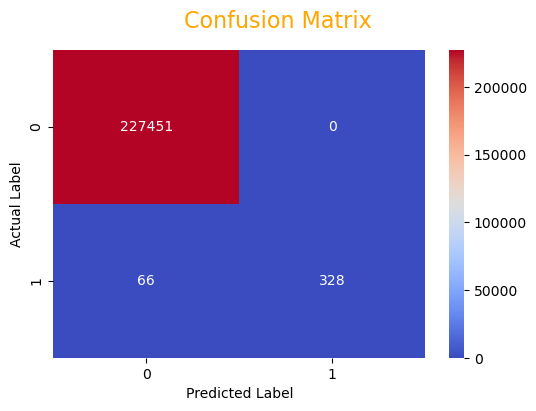

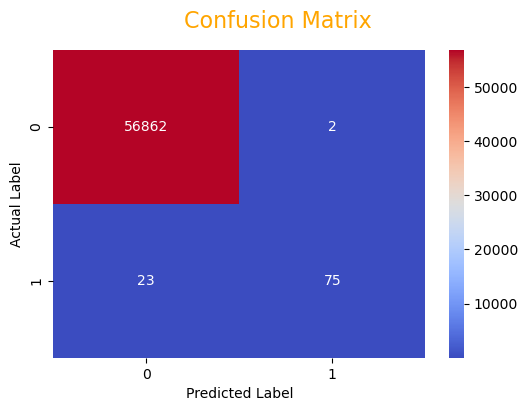

In [23]:
acc_normal_test=RF_model(main.x, main.y)

### RandomForestClassifier on Undersampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!

------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       393
           1       1.00      0.99      0.99       394

    accuracy                           0.99       787
   macro avg       0.99      0.99      0.99       787
weighted avg       0.99      0.99      0.99       787



Accuracy Score (Train): 99.491741%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



Accuracy Score (Test): 91.878173%



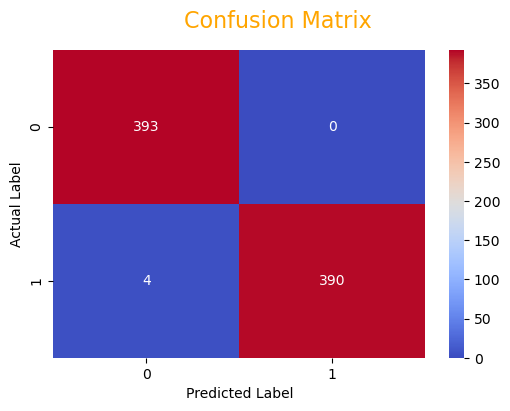

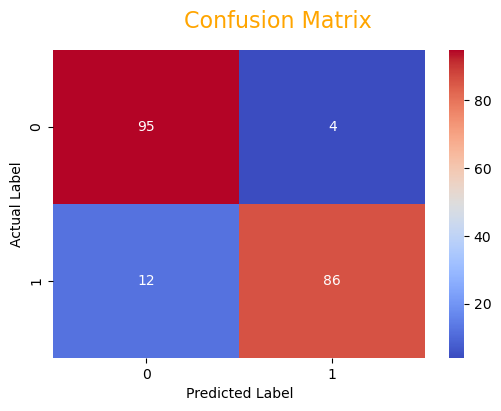

In [25]:
acc_under_test=RF_model(main.x_undersampled, main.y_undersampled)

### RandomForestClassifier on Oversampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!

------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    227335
           1       1.00      0.99      0.99    227569

    accuracy                           0.99    454904
   macro avg       0.99      0.99      0.99    454904
weighted avg       0.99      0.99      0.99    454904



Accuracy Score (Train): 99.255447%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56980
           1       1.00      0.99      0.99     56746

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



Accuracy Score (Test): 99.289520%



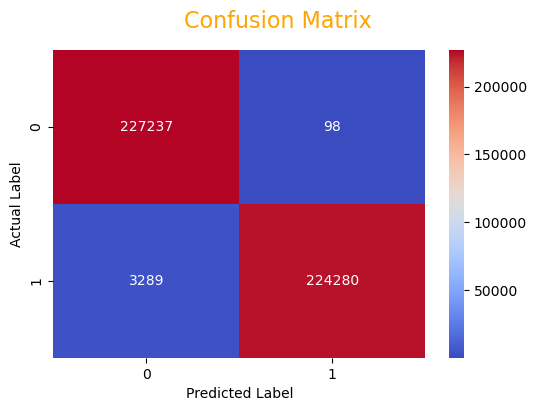

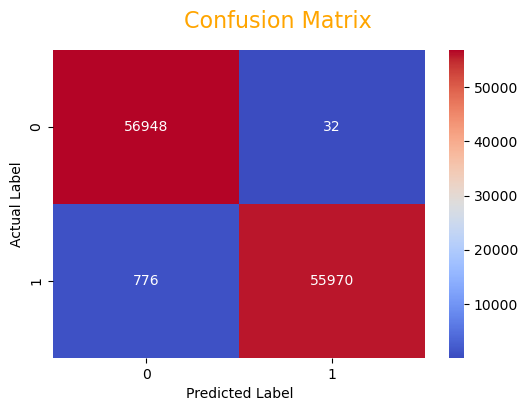

In [27]:
acc_over_test=RF_model(main.x_oversampled, main.y_oversampled)

### RandomForestClassifier on SMOTE Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!

------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    227565
           1       1.00      0.98      0.99    227339

    accuracy                           0.99    454904
   macro avg       0.99      0.99      0.99    454904
weighted avg       0.99      0.99      0.99    454904



Accuracy Score (Train): 98.793592%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56750
           1       1.00      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



Accuracy Score (Test): 98.764575%



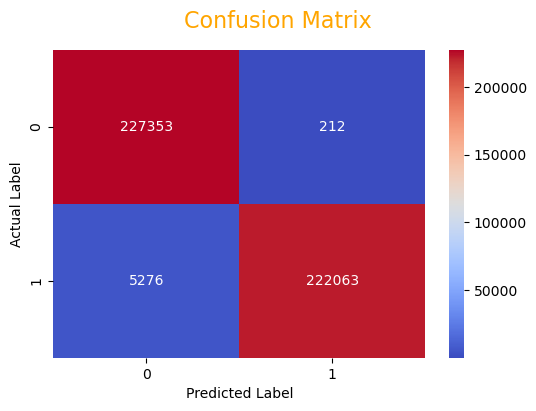

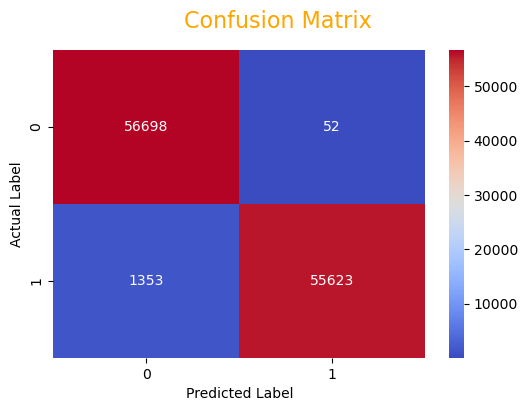

In [29]:
acc_smote_test=RF_model(main.x_smote, main.y_smote)

### Comparison of Test Accuracy Across Sampling Techniques

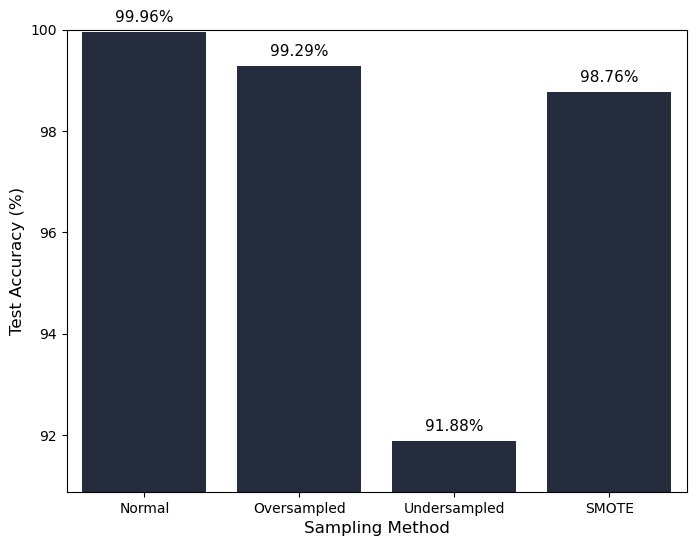

In [32]:
test_accuracies = {
    "Normal": acc_normal_test * 100,
    "Oversampled": acc_over_test * 100,
    "Undersampled": acc_under_test * 100,
    "SMOTE": acc_smote_test * 100
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()),color='#202a41')
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.xlabel("Sampling Method", fontsize=12)

for i, acc in enumerate(test_accuracies.values()):
    plt.text(i, acc + 0.2, f"{acc:.2f}%", ha='center', fontsize=11)

plt.ylim(min(test_accuracies.values()) - 1, 100)
plt.show()